# Students’ Academic Performance Prediction using Data Mining 

#### Import libraries

In [1]:
import numpy as np
import csv
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
from sklearn.tree import DecisionTreeClassifier # import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline

Dataset URL - http://archive.ics.uci.edu/ml/datasets/Student+Performance

#### Labels According to G3 - final grade

The others (0–9, 9–15, and 15–20) correspond to  C (poor), B (average), and A (good) class labels, respectively.

###   Dataset Pre-processing


##### files merging

In [2]:
data_path1 = 'student-por.csv'
data_path2 = 'student-mat.csv'

In [3]:
df1 = pd.read_csv(data_path1, sep = ';')
df2 = pd.read_csv(data_path2, sep = ';') 
frames = [df1, df2]
  
result = pd.concat(frames)

#### Import dataset

In [4]:
result.to_csv('format_out.csv')
df = pd.read_csv('format_out.csv')
df = df.iloc[: , 1:]

In [5]:
#data of column 'G3' categorized into three categories according to above mentioned criteria
bins = [-1, 9, 15, 20]
labels = ['C', 'B', 'A']

df['G3'] = pd.cut(df['G3'], bins=bins, labels=labels)

In [6]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,B
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,B
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,B
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,B
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,B


In [7]:
df[df.isna().any(axis=1)].iloc[:, :]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


#### Exploratory data analysis 

In [8]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
lable_counts = df[['G3']].value_counts()
lable_counts

G3
B     692
C     230
A     122
dtype: int64

<AxesSubplot:title={'center':'Values Counts of G3'}, ylabel='G3'>

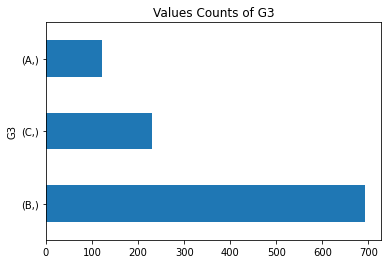

In [10]:
lable_counts.plot(kind = 'barh', title = 'Values Counts of G3')

In [11]:
counts = df[['sex']].value_counts()
counts

sex
F      591
M      453
dtype: int64

<AxesSubplot:title={'center':'Values Counts of Sex Column'}, xlabel='sex'>

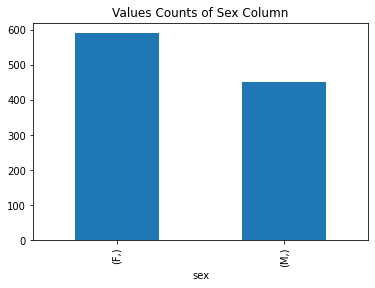

In [12]:
counts.plot(kind = 'bar', title = 'Values Counts of Sex Column')

<AxesSubplot:title={'center':'Values Counts of Age Column'}, xlabel='age'>

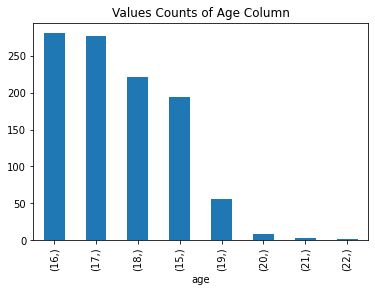

In [13]:
counts = df[['age']].value_counts()
counts
counts.plot(kind = 'bar', title = 'Values Counts of Age Column')

Above plot shows the number of participated peoples according to their gender.

#### Missing values in variables

In [14]:
# check missing values in variables
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

#### Label encode the column data and Split data into separate training and test set

In [15]:
labelencoder = LabelEncoder()
encoded_df = df.apply(LabelEncoder().fit_transform)
X = encoded_df.drop(['G3'], axis=1)
y = encoded_df['G3']

#### Feature Selection

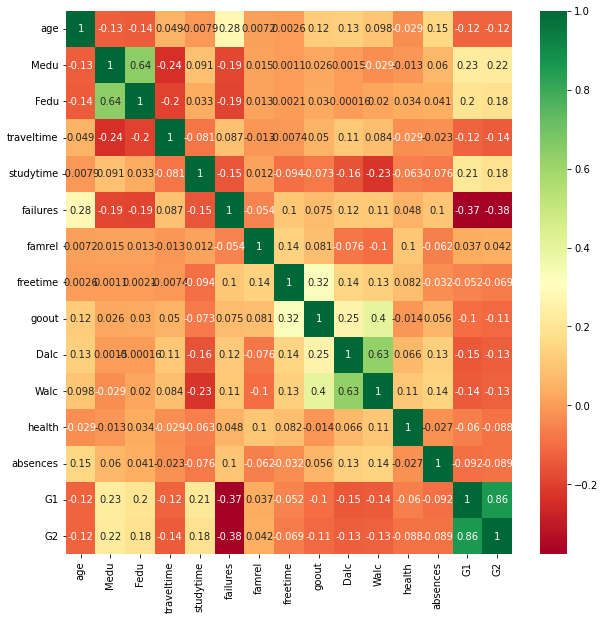

In [16]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Apply SMOTE to prevent class imbalance

In [17]:
# !pip install -U imbalanced-learn

In [18]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [19]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [20]:
# check the shape of X_train and X_test
X_train.shape, X_test.shape
# check data in X_train
X_train.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
1904,1,1,2,0,0,1,1,2,0,2,...,0,2,2,3,1,3,2,0,6,7
300,0,0,3,1,0,1,4,3,3,2,...,1,2,0,1,0,2,1,2,13,12
1223,0,1,0,1,0,1,3,4,3,1,...,0,2,1,1,0,0,4,7,13,12
780,0,0,0,1,0,1,1,1,0,2,...,1,3,2,2,0,1,3,0,6,0
674,0,0,1,1,0,1,2,2,3,3,...,0,0,1,1,0,2,4,14,4,6


### Try Different Machine Learning algorithms

#### 1. Decision Tree Classifier with criterion gini index 

In [34]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)

# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=1)

#### Predict the Test set results with criterion gini index

In [35]:
y_pred_gini = clf_gini.predict(X_test)
# y_pred_gini

#### Check accuracy score with criterion gini index

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print('Decision Tree Classifier accuracy score with criterion gini index: {0:0.2f}%'. format(accuracy_score(y_test, y_pred_gini)*100))

Decision Tree Classifier accuracy score with criterion gini index: 89.66%


Check for overfitting and underfitting

In [37]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.9777
Test set score: 0.8966


Accurcy of the Decision Tree Classifier

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       129
           1       0.88      0.80      0.84       143
           2       0.91      0.93      0.92       144

    accuracy                           0.90       416
   macro avg       0.90      0.90      0.90       416
weighted avg       0.90      0.90      0.90       416



feature_importances of tree based classifiers

[5.39489353e-03 0.00000000e+00 3.45005230e-03 0.00000000e+00
 4.16250796e-03 2.31933967e-03 6.17498915e-03 5.14795539e-04
 7.17982161e-03 5.89892619e-03 1.13326974e-02 6.59313274e-03
 1.59955864e-02 2.55109623e-03 4.56870351e-03 1.09316509e-03
 1.26935886e-03 1.02002806e-02 1.23463238e-02 0.00000000e+00
 1.95913684e-03 8.05554664e-04 8.27198860e-03 1.73402173e-03
 6.14267397e-03 9.96582109e-03 5.49485138e-03 5.72308973e-03
 6.15179305e-03 2.31231871e-02 1.48175198e-02 8.14764692e-01]


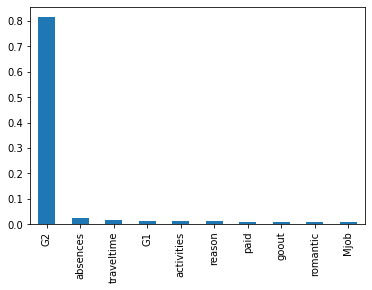

G2            0.814765
absences      0.023123
traveltime    0.015996
G1            0.014818
activities    0.012346
reason        0.011333
paid          0.010200
goout         0.009966
romantic      0.008272
Mjob          0.007180
dtype: float64


<Figure size 576x144 with 0 Axes>

In [39]:
print(clf_gini.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(clf_gini.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', )
plt.show()
plt.figure(figsize=(8, 2))
print(feat_importances.nlargest(10))

#### Visualize decision-trees

In [40]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                                feature_names=X_train.columns,   
                                special_characters=True,
                                filled=True)

In [41]:
deci_tree=graphviz.Source(dot_data,format='jpg')
deci_tree.save(filename='deci_tree_1.jpg')
deci_tree.render(filename='deci_tree_1')


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [42]:
from IPython.display import Image
Image(filename='deci_tree.jpg', width=1000)

## Changing the max_depth

In [43]:
train_depth_accuracy=[]
test_depth_accuracy=[]
for depth in range(1,30):
    clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=depth, random_state=1)
    # fit the model
    clf_gini.fit(X_train, y_train)
    y_pred_test_gini = clf_gini.predict(X_test)   
    test_depth_accuracy.append(accuracy_score(y_test, y_pred_test_gini))
    
    y_pred_train_gini = clf_gini.predict(X_train)   
    train_depth_accuracy.append(accuracy_score(y_train, y_pred_train_gini))


In [44]:
frame=pd.DataFrame({'max_depth':range(1,30),'train_acc':train_depth_accuracy,'test_acc':test_depth_accuracy})

In [45]:
frame.head(n=30)

,max_depth,train_acc,test_acc
0,1,0.666867,0.656250
1,2,0.890964,0.872596
2,3,0.904819,0.870192
3,4,0.920482,0.877404
4,5,0.934940,0.879808
5,6,0.953614,0.877404
6,7,0.968072,0.889423
7,8,0.977711,0.896635
8,9,0.987349,0.879808
9,10,0.992169,0.887019


In [46]:
frame.iloc[frame['test_acc'].idxmax()]

max_depth    8.000000
train_acc    0.977711
test_acc     0.896635
Name: 7, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


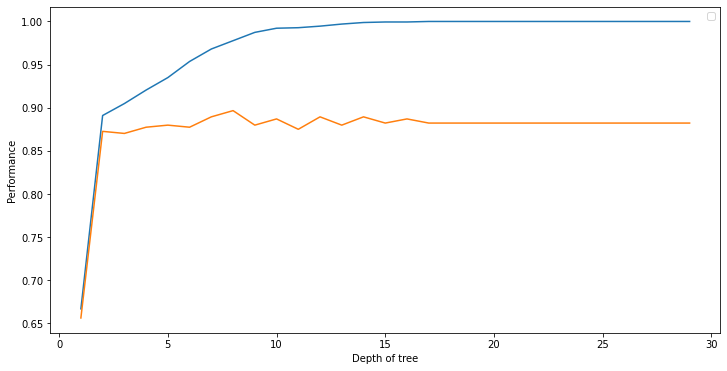

In [47]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'])
plt.plot(frame['max_depth'],frame['test_acc'])
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

Classification Method Results Using K-fold Cross Validation

In [48]:
# evaluate model using k-fold cross-validation
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=1)
# evaluate model
scores05_accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

Accuracy when k =05: 0.897 (0.012)
Accuracy when k =10: 0.902 (0.015)


2. Random Forest Classifier 

In [58]:
from sklearn.ensemble import RandomForestClassifier
# instantiate the RandomForestClassifier

rfc = RandomForestClassifier(max_depth=13, random_state=1)

# fit the model
rfc.fit(X_train, y_train)


RandomForestClassifier(max_depth=13, random_state=1)

In [59]:
#predict
y_pred_rfc = rfc.predict(X_test)
#Check accuracy score

print('Random Forest Classifier accuracy score: {0:0.2f}%'. format(accuracy_score(y_test, y_pred_rfc)*100))

Random Forest Classifier accuracy score: 92.55%


In [60]:
#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(rfc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(rfc.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9255


In [61]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       129
           1       0.96      0.82      0.88       143
           2       0.91      0.98      0.94       144

    accuracy                           0.93       416
   macro avg       0.93      0.93      0.92       416
weighted avg       0.93      0.93      0.92       416



[0.00648937 0.00882503 0.0139731  0.00720959 0.00905546 0.00382719
 0.02316951 0.01597558 0.01373303 0.01121983 0.01249786 0.01048376
 0.01635136 0.01444204 0.02437464 0.00853935 0.00667694 0.01508065
 0.01058811 0.00585671 0.02850313 0.00611366 0.0066436  0.01404667
 0.01600677 0.01699321 0.00802007 0.01527194 0.01425363 0.02489584
 0.23226412 0.37861828]


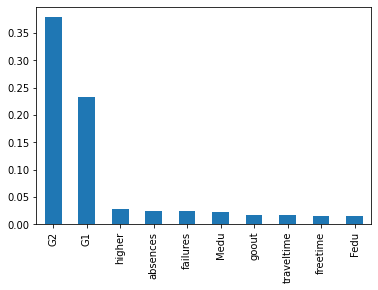

G2            0.378618
G1            0.232264
higher        0.028503
absences      0.024896
failures      0.024375
Medu          0.023170
goout         0.016993
traveltime    0.016351
freetime      0.016007
Fedu          0.015976
dtype: float64


<Figure size 576x144 with 0 Axes>

In [62]:
# feature importannce of the random forst classifier 
print(rfc.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(rfc.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='bar', )
plt.show()
plt.figure(figsize=(8, 2))
print(feat_importances.nlargest(10))

In [63]:
# Changinge the max_depth 
train_depth_accuracy=[]
test_depth_accuracy=[]
for depth in range(1,30):
    rfc = RandomForestClassifier(max_depth=depth, random_state=1)
    # fit the model
    rfc.fit(X_train, y_train)
    y_pred_test_gini = rfc.predict(X_test)   
    test_depth_accuracy.append(accuracy_score(y_test, y_pred_test_gini))
    
    y_pred_train_rfc = rfc.predict(X_train)   
    train_depth_accuracy.append(accuracy_score(y_train, y_pred_train_gini))


In [64]:
frame=pd.DataFrame({'max_depth':range(1,30),'train_acc':train_depth_accuracy,'test_acc':test_depth_accuracy})
frame.head(n=30)
frame.iloc[frame['test_acc'].idxmax()]

max_depth    13.000000
train_acc     1.000000
test_acc      0.925481
Name: 12, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


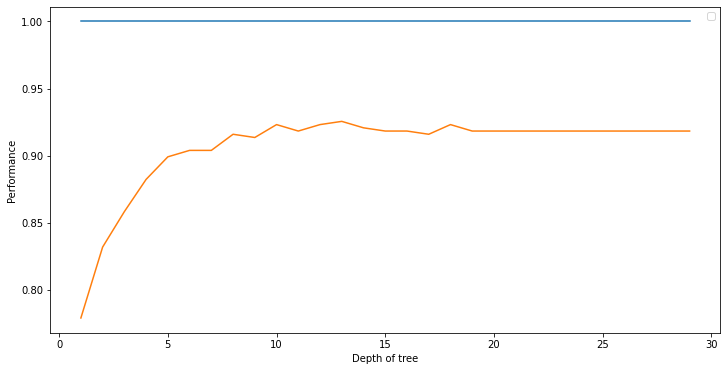

In [65]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['train_acc'])
plt.plot(frame['max_depth'],frame['test_acc'])
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

In [66]:
# evaluate model using k-fold cross-validation
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier( max_depth=13, random_state=1)
# evaluate model
scores05_accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

Accuracy when k =05: 0.927 (0.022)
Accuracy when k =10: 0.930 (0.025)


3. SVM

In [67]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier
svm=SVC()
ovo = OneVsOneClassifier(svm) ##Used for multiclass classification
# ovr.fit(X_train, y_train)
ovo.fit(X_train, y_train)

OneVsOneClassifier(estimator=SVC())

In [68]:
#predict
y_pred_ovo = ovo.predict(X_test)
#Check accuracy score

print('SVM with multiclass classification accuracy score: {0:0.2f}%'. format(accuracy_score(y_test, y_pred_ovo)*100))

SVM with multiclass classification accuracy score: 90.38%


In [69]:
#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(ovo.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(ovo.score(X_test, y_test)))

Training set score: 0.9265
Test set score: 0.9038


In [70]:
print(classification_report(y_test, y_pred_ovo))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       129
           1       0.94      0.77      0.85       143
           2       0.90      0.97      0.93       144

    accuracy                           0.90       416
   macro avg       0.91      0.91      0.90       416
weighted avg       0.91      0.90      0.90       416



In [71]:
# evaluate model using k-fold cross-validation
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = ovo
# evaluate model
scores05_accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

Accuracy when k =05: 0.910 (0.022)
Accuracy when k =10: 0.914 (0.028)


4. KNN

In [72]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# fit the model
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [73]:
#predict
y_pred_neigh = neigh.predict(X_test)
#Check accuracy score

print('KNN accuracy score: {0:0.2f}%'. format(accuracy_score(y_test, y_pred_neigh)*100))

KNN accuracy score: 90.38%


In [74]:
#Check for overfitting and underfitting
print('Training set score: {:.4f}'.format(neigh.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(neigh.score(X_test, y_test)))

Training set score: 1.0000
Test set score: 0.9038


In [75]:
print(classification_report(y_test, y_pred_neigh))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       129
           1       0.96      0.75      0.84       143
           2       0.87      0.98      0.92       144

    accuracy                           0.90       416
   macro avg       0.91      0.91      0.90       416
weighted avg       0.91      0.90      0.90       416



In [76]:
# Changinge the n_neighbors 
train_depth_accuracy=[]
test_depth_accuracy=[]
for n in range(1,50):
    neigh = KNeighborsClassifier(n_neighbors=n)
    # fit the model
    neigh.fit(X_train, y_train)
    y_pred_test_neigh = neigh.predict(X_test)   
    test_depth_accuracy.append(accuracy_score(y_test, y_pred_test_neigh))
    
    y_pred_train_neigh = neigh.predict(X_train)   
    train_depth_accuracy.append(accuracy_score(y_train, y_pred_train_neigh))


In [77]:
frame=pd.DataFrame({'n_neighbors':range(1,50),'train_acc':train_depth_accuracy,'test_acc':test_depth_accuracy})
frame.head(n=30)
frame.iloc[frame['test_acc'].idxmax()]

n_neighbors    1.000000
train_acc      1.000000
test_acc       0.903846
Name: 0, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


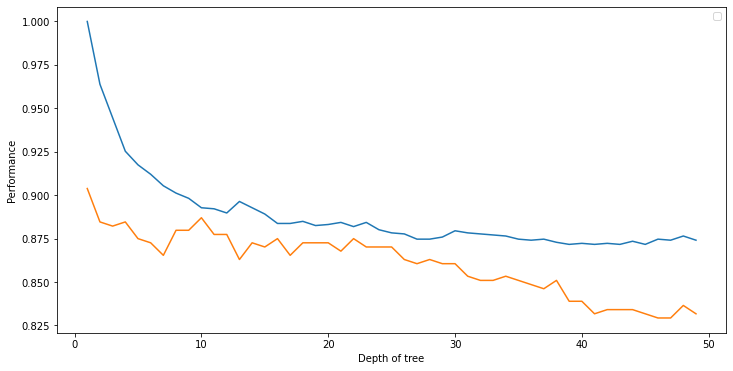

In [78]:
plt.figure(figsize=(12,6))
plt.plot(frame['n_neighbors'],frame['train_acc'])
plt.plot(frame['n_neighbors'],frame['test_acc'])
plt.xlabel('Depth of tree')
plt.ylabel('Performance')
plt.legend()

In [79]:
# evaluate model using k-fold cross-validation
# prepare the cross-validation procedure
cv05 = KFold(n_splits=5, random_state=1, shuffle=True)
cv10 = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = KNeighborsClassifier(n_neighbors=1)
# evaluate model
scores05_accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv05, n_jobs=-1)
scores10_accuracy = cross_val_score(model, X, y, scoring='accuracy', cv=cv10, n_jobs=-1)
print('Accuracy when k =05: %.3f (%.3f)' % (mean(scores05_accuracy), std(scores05_accuracy)))
print('Accuracy when k =10: %.3f (%.3f)' % (mean(scores10_accuracy), std(scores10_accuracy)))

Accuracy when k =05: 0.917 (0.008)
Accuracy when k =10: 0.917 (0.012)
